In [1]:
# import pydicom
import numpy
import os
import matplotlib.pyplot as plt
import pandas as pd

# Preprocessing Notebook

Here is a notebook to help with data preprocessing. This uses the RSNA competition data. Link to competition data: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

## Displaying Data

I'll go through a series of steps on how to display dcm data and its associated bounding box(es).

In [2]:
base_folder = '../../vbd_vol/train_jpgs/'
data_files = os.listdir(base_folder)
data_files = [base_folder + file for file in data_files]
data_files[:5]

['../../vbd_vol/train_jpgs/000434271f63a053c4128a0ba6352c7f.jpg',
 '../../vbd_vol/train_jpgs/00053190460d56c53cc3e57321387478.jpg',
 '../../vbd_vol/train_jpgs/0005e8e3701dfb1dd93d53e2ff537b6e.jpg',
 '../../vbd_vol/train_jpgs/0006e0a85696f6bb578e84fafa9a5607.jpg',
 '../../vbd_vol/train_jpgs/0007d316f756b3fa0baea2ff514ce945.jpg']

Lets display one of these files.

Lets get the label for this image and display it.

In [3]:
base_folder_labels = '../../vbd_vol/bbox_table.csv'
base_folder_paths = '../../vbd_vol/path_table.csv'
label_df = pd.read_csv(base_folder_labels)
path_df = pd.read_csv(base_folder_paths)
label_df = label_df.merge(path_df, on='Image_Index')
# label_df = label_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

def correct_path(x):
    tf_path = '/home/tensorflow/aeolux2/vbd_vol/train_jpgs/'
    suffix = x.replace(".png", ".jpgs")
    return tf_path + suffix

label_df['jpg_path'] = label_df['path']
label_df['fake_path'] = label_df['Image_Index'].apply(correct_path)
label_df.head()

,Image_Index,Target,x,y,w,h,path,jpg_path,fake_path
0,183015e171f5159d7e60d43578632a3f.jpg,Aortic enlargement,567.0,295.0,104.0,122.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
1,183015e171f5159d7e60d43578632a3f.jpg,Pleural thickening,58.0,794.0,58.0,57.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
2,183015e171f5159d7e60d43578632a3f.jpg,Pleural effusion,58.0,794.0,58.0,57.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
3,183015e171f5159d7e60d43578632a3f.jpg,Aortic enlargement,573.0,296.0,97.0,77.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
4,183015e171f5159d7e60d43578632a3f.jpg,Pleural thickening,72.0,813.0,38.0,51.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...


In [4]:
sample_id = '183015e171f5159d7e60d43578632a3f.jpg'
sample_bbox = label_df.query(f"Image_Index == '{sample_id}'")
sample_bbox

,Image_Index,Target,x,y,w,h,path,jpg_path,fake_path
0,183015e171f5159d7e60d43578632a3f.jpg,Aortic enlargement,567.0,295.0,104.0,122.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
1,183015e171f5159d7e60d43578632a3f.jpg,Pleural thickening,58.0,794.0,58.0,57.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
2,183015e171f5159d7e60d43578632a3f.jpg,Pleural effusion,58.0,794.0,58.0,57.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
3,183015e171f5159d7e60d43578632a3f.jpg,Aortic enlargement,573.0,296.0,97.0,77.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
4,183015e171f5159d7e60d43578632a3f.jpg,Pleural thickening,72.0,813.0,38.0,51.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
5,183015e171f5159d7e60d43578632a3f.jpg,Cardiomegaly,416.0,581.0,444.0,190.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...


In [5]:
bbox_coords = sample_bbox[['x', 'y', 'w', 'h']].values
sample_path = sample_bbox['path'].values[0]
sample_fake_path = sample_bbox['fake_path'].values[0]
sample_jpg_path = sample_bbox['jpg_path'].values[0]
bbox_coords, sample_path, sample_fake_path, sample_jpg_path

(array([[567., 295., 104., 122.],
        [ 58., 794.,  58.,  57.],
        [ 58., 794.,  58.,  57.],
        [573., 296.,  97.,  77.],
        [ 72., 813.,  38.,  51.],
        [416., 581., 444., 190.]]),
 '../../vbd_vol/train_jpgs/183015e171f5159d7e60d43578632a3f.jpg',
 '/home/tensorflow/aeolux2/vbd_vol/train_jpgs/183015e171f5159d7e60d43578632a3f.jpg',
 '../../vbd_vol/train_jpgs/183015e171f5159d7e60d43578632a3f.jpg')

567.0 295.0 671.0 417.0
58.0 794.0 116.0 851.0
58.0 794.0 116.0 851.0
573.0 296.0 670.0 373.0
72.0 813.0 110.0 864.0
416.0 581.0 860.0 771.0


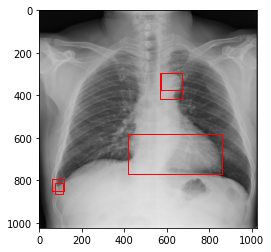

In [6]:
from matplotlib.patches import Rectangle
from PIL import Image
import numpy as np

sample_img = Image.open(sample_path).convert('RGB')
sample_img = np.array(sample_img)
plt.imshow(sample_img, cmap=plt.cm.bone)
ax = plt.gca()
for bbox_coord in bbox_coords:
    x, y, w, h = bbox_coord
    print(x, y, x + w, y + h)
    rect = Rectangle((x, y), w, h, linewidth=1, edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

## PASCAL VOC Label Conversion

It might be advantageous for us to convert our labels into PASCAL VOC label format. A typical example is as follows:

```
<annotation>
	<folder>GeneratedData_Train</folder>
	<filename>000001.png</filename>
	<path>/my/path/GeneratedData_Train/000001.png</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>224</width>
		<height>224</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>21</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<occluded>0</occluded>
		<bndbox>
			<xmin>82</xmin>
			<xmax>172</xmax>
			<ymin>88</ymin>
			<ymax>146</ymax>
		</bndbox>
	</object>
</annotation>
```

An explanation of the fields can be found here: https://towardsdatascience.com/coco-data-format-for-object-detection-a4c5eaf518c5

In [7]:
from tqdm import tqdm

In [8]:
def make_pascal_voc(src, folder, filename, bbox_coords, img_shape):
    object_xml = ''
    
    def isNan(x):
        return x != x
    
    for bbox_coord in bbox_coords:
        x, y, w, h, target = bbox_coord
        xmin, xmax, ymin, ymax = x, x + w, y, y + h
        
        if target == 0:
            continue
            
        if xmin > xmax:
            print(src)

        object_xml += f"""\n    <object>
        <name>{target}</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <occluded>0</occluded>
        <bndbox>
            <xmin>{xmin}</xmin>
            <xmax>{xmax}</xmax>
            <ymin>{ymin}</ymin>
            <ymax>{ymax}</ymax>
        </bndbox>
    </object>"""
        
    return f"""<annotation>
    <folder>{folder}</folder>
    <filename>{filename}</filename>
    <path>{folder}/{filename}</path>
    <source>
        <database>{src}</database>
    </source>
    <size>
        <width>{img_shape[0]}</width>
        <height>{img_shape[1]}</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>{object_xml}
</annotation>"""

In [9]:
from tqdm import tqdm

pascal_voc_groups = {}
# Image_Index Target x y w h path fake_path
for row in tqdm(label_df.iterrows()):
    index, (iid, target, x, y, w, h, path, jpg_path, fake_path) = row
    if iid not in pascal_voc_groups:
        pascal_voc_groups[iid] = []
    pascal_voc_groups[iid].append((x, y, w, h, target, fake_path))

36096it [00:02, 12500.77it/s]


In [10]:
max([len(pascal_voc_groups[k]) for k in pascal_voc_groups.keys()])

57

In [11]:
from pathlib import Path

for iid, data_row in tqdm(pascal_voc_groups.items()):
    fake_path = data_row[0][-1]
    data_row = [d_row[:-1] for d_row in data_row]
    img_w, img_h = 1024, 1024
    
    if len(data_row) == 0:
        continue
    
    pv_str = make_pascal_voc(
        'vbd',
        '/'.join(fake_path.split('/')[:-1]), 
        iid, 
        data_row, (img_w, img_h))
    
    iid = iid.replace('.jpg', '')
    pv_filename = f'../../vbd_vol/pascal_labels/{iid}.xml'
    with open(pv_filename, 'w') as f:
        f.write(pv_str)

100%|██████████| 4394/4394 [00:01<00:00, 3387.63it/s]


In [12]:
len(os.listdir('../../vbd_vol/train_jpgs/')), len(os.listdir('../../vbd_vol/pascal_labels/'))

(15000, 4394)

In [13]:
# Checking contents of file with bounding boxes
another_sample_pid2 = '183015e171f5159d7e60d43578632a3f'
base_label_path = '../../vbd_vol/pascal_labels'
with open(f'{base_label_path}/{another_sample_pid2}.xml', 'r') as f:
    file_content = f.read()
print(file_content)

<annotation>
    <folder>/home/tensorflow/aeolux2/vbd_vol/train_jpgs</folder>
    <filename>183015e171f5159d7e60d43578632a3f.jpg</filename>
    <path>/home/tensorflow/aeolux2/vbd_vol/train_jpgs/183015e171f5159d7e60d43578632a3f.jpg</path>
    <source>
        <database>vbd</database>
    </source>
    <size>
        <width>1024</width>
        <height>1024</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>Aortic enlargement</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <occluded>0</occluded>
        <bndbox>
            <xmin>567.0</xmin>
            <xmax>671.0</xmax>
            <ymin>295.0</ymin>
            <ymax>417.0</ymax>
        </bndbox>
    </object>
    <object>
        <name>Pleural thickening</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <occluded>0</occluded>
        <bndbox>
           

## Defining Train, Eval, Test Splits

In [14]:
from sklearn.model_selection import train_test_split

new_path_df = path_df
new_path_df

,Image_Index,path
0,183015e171f5159d7e60d43578632a3f.jpg,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...
1,e1eb9553f694d0eba82535625d70186c.jpg,../../vbd_vol/train_jpgs/e1eb9553f694d0eba8253...
2,97bd8561208807d003ff804d69348974.jpg,../../vbd_vol/train_jpgs/97bd8561208807d003ff8...
3,16241940f17e8c7aae3e6236b25a7c84.jpg,../../vbd_vol/train_jpgs/16241940f17e8c7aae3e6...
4,9850d20ee4d2bf722154a90ae07ddff8.jpg,../../vbd_vol/train_jpgs/9850d20ee4d2bf722154a...
...,...,...
4389,bb315b4bc113c0506a9e24593cb06a6b.jpg,../../vbd_vol/train_jpgs/bb315b4bc113c0506a9e2...
4390,a3dcbf04ea4cf926b6efb6ac526d5ff9.jpg,../../vbd_vol/train_jpgs/a3dcbf04ea4cf926b6efb...
4391,4c029c4f3deed9414b157053867709b0.jpg,../../vbd_vol/train_jpgs/4c029c4f3deed9414b157...
4392,a9ed4b5aaf129325369ebae1cfd5e321.jpg,../../vbd_vol/train_jpgs/a9ed4b5aaf129325369eb...


In [15]:
x_train, x_test = train_test_split(new_path_df, test_size=0.2, random_state=0)
x_train, x_eval = train_test_split(x_train, test_size=0.2, random_state=42)

In [16]:
x_train['set'] = ['TRAINING'] * x_train.shape[0]
x_eval['set'] = ['VALIDATION'] * x_eval.shape[0]
x_test['set'] = ['TEST'] * x_test.shape[0]

/miniconda/envs/aeolux/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
splits_df = pd.concat([x_train, x_eval, x_test])
splits_df = splits_df.drop(columns=['path']).reset_index(drop='index')
splits_df

,Image_Index,set
0,97fd4f6e94b84fc564ae30aec660e443.jpg,TRAINING
1,37054193bd4e6a2f3ca764088913b0f0.jpg,TRAINING
2,62863bee894cbb15f96074e8da760b40.jpg,TRAINING
3,89bab84561df6af7b88b6a7d05254725.jpg,TRAINING
4,3df005a70ab162381374fd43655aa145.jpg,TRAINING
...,...,...
4389,a8ae76a6902d594f90596f039ffca026.jpg,TEST
4390,382fde0b4f36b498850d79b00cf5593d.jpg,TEST
4391,e282be557a81566f8ccc78271c7f2ff2.jpg,TEST
4392,53d4fbf11ca8be107a343df37ca9eddc.jpg,TEST


In [18]:
splits_df.to_csv('../../vbd_vol/splits.csv', index=False)

## Moving Files to tf_obj_files

In [19]:
splits_df = pd.read_csv('../../vbd_vol/splits.csv')
splits_df

,Image_Index,set
0,97fd4f6e94b84fc564ae30aec660e443.jpg,TRAINING
1,37054193bd4e6a2f3ca764088913b0f0.jpg,TRAINING
2,62863bee894cbb15f96074e8da760b40.jpg,TRAINING
3,89bab84561df6af7b88b6a7d05254725.jpg,TRAINING
4,3df005a70ab162381374fd43655aa145.jpg,TRAINING
...,...,...
4389,a8ae76a6902d594f90596f039ffca026.jpg,TEST
4390,382fde0b4f36b498850d79b00cf5593d.jpg,TEST
4391,e282be557a81566f8ccc78271c7f2ff2.jpg,TEST
4392,53d4fbf11ca8be107a343df37ca9eddc.jpg,TEST


In [20]:
# Checking on intersections
train_set = splits_df.query("set == 'TRAINING'")
eval_set = splits_df.query("set == 'VALIDATION'")
test_set = splits_df.query("set == 'TEST'")

train_set = set(train_set['Image_Index'].values.tolist())
eval_set = set(eval_set['Image_Index'].values.tolist())
test_set = set(test_set['Image_Index'].values.tolist())

In [21]:
train_set.intersection(eval_set)

set()

In [22]:
train_set.intersection(test_set)

set()

In [23]:
test_set.intersection(eval_set)

set()

In [24]:
big_splits_df = splits_df.merge(label_df, on='Image_Index')
big_splits_df

,Image_Index,set,Target,x,y,w,h,path,jpg_path,fake_path
0,97fd4f6e94b84fc564ae30aec660e443.jpg,TRAINING,Aortic enlargement,520.0,290.0,149.0,139.0,../../vbd_vol/train_jpgs/97fd4f6e94b84fc564ae3...,../../vbd_vol/train_jpgs/97fd4f6e94b84fc564ae3...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/97...
1,97fd4f6e94b84fc564ae30aec660e443.jpg,TRAINING,Cardiomegaly,355.0,623.0,559.0,141.0,../../vbd_vol/train_jpgs/97fd4f6e94b84fc564ae3...,../../vbd_vol/train_jpgs/97fd4f6e94b84fc564ae3...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/97...
2,97fd4f6e94b84fc564ae30aec660e443.jpg,TRAINING,Aortic enlargement,529.0,289.0,145.0,138.0,../../vbd_vol/train_jpgs/97fd4f6e94b84fc564ae3...,../../vbd_vol/train_jpgs/97fd4f6e94b84fc564ae3...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/97...
3,97fd4f6e94b84fc564ae30aec660e443.jpg,TRAINING,Cardiomegaly,355.0,581.0,567.0,149.0,../../vbd_vol/train_jpgs/97fd4f6e94b84fc564ae3...,../../vbd_vol/train_jpgs/97fd4f6e94b84fc564ae3...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/97...
4,97fd4f6e94b84fc564ae30aec660e443.jpg,TRAINING,Cardiomegaly,357.0,571.0,555.0,188.0,../../vbd_vol/train_jpgs/97fd4f6e94b84fc564ae3...,../../vbd_vol/train_jpgs/97fd4f6e94b84fc564ae3...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/97...
...,...,...,...,...,...,...,...,...,...,...
36091,13776ecb39222a7aaace2d9721abebbe.jpg,TEST,Pleural effusion,136.0,670.0,176.0,160.0,../../vbd_vol/train_jpgs/13776ecb39222a7aaace2...,../../vbd_vol/train_jpgs/13776ecb39222a7aaace2...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/13...
36092,13776ecb39222a7aaace2d9721abebbe.jpg,TEST,Consolidation,122.0,177.0,365.0,743.0,../../vbd_vol/train_jpgs/13776ecb39222a7aaace2...,../../vbd_vol/train_jpgs/13776ecb39222a7aaace2...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/13...
36093,13776ecb39222a7aaace2d9721abebbe.jpg,TEST,Pleural thickening,160.0,174.0,255.0,496.0,../../vbd_vol/train_jpgs/13776ecb39222a7aaace2...,../../vbd_vol/train_jpgs/13776ecb39222a7aaace2...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/13...
36094,13776ecb39222a7aaace2d9721abebbe.jpg,TEST,Pleural effusion,158.0,159.0,336.0,664.0,../../vbd_vol/train_jpgs/13776ecb39222a7aaace2...,../../vbd_vol/train_jpgs/13776ecb39222a7aaace2...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/13...


In [25]:
big_splits_df.query("Image_Index == '183015e171f5159d7e60d43578632a3f.jpg'")

,Image_Index,set,Target,x,y,w,h,path,jpg_path,fake_path
25616,183015e171f5159d7e60d43578632a3f.jpg,VALIDATION,Aortic enlargement,567.0,295.0,104.0,122.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
25617,183015e171f5159d7e60d43578632a3f.jpg,VALIDATION,Pleural thickening,58.0,794.0,58.0,57.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
25618,183015e171f5159d7e60d43578632a3f.jpg,VALIDATION,Pleural effusion,58.0,794.0,58.0,57.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
25619,183015e171f5159d7e60d43578632a3f.jpg,VALIDATION,Aortic enlargement,573.0,296.0,97.0,77.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
25620,183015e171f5159d7e60d43578632a3f.jpg,VALIDATION,Pleural thickening,72.0,813.0,38.0,51.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...
25621,183015e171f5159d7e60d43578632a3f.jpg,VALIDATION,Cardiomegaly,416.0,581.0,444.0,190.0,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...,/home/tensorflow/aeolux2/vbd_vol/train_jpgs/18...


In [32]:
from shutil import copyfile

vbd_tf_path = '../../vbd_vol/tf_obj_files/'
xml_path = '../../vbd_vol/pascal_labels/'
tf_obj_paths = {
    'TRAINING': (os.path.join(vbd_tf_path, 'train'), os.path.join(vbd_tf_path, 'train_labels')),
    'VALIDATION': (os.path.join(vbd_tf_path, 'eval'), os.path.join(vbd_tf_path, 'eval_labels')),
    'VALIDATE': (os.path.join(vbd_tf_path, 'eval'), os.path.join(vbd_tf_path, 'eval_labels')),
    'TEST': (os.path.join(vbd_tf_path, 'test'), os.path.join(vbd_tf_path, 'test_labels'))
}

for index, data_row in tqdm(big_splits_df.drop_duplicates('Image_Index').iterrows()):
    dataset = data_row['set']
    img_path = data_row['jpg_path']
    img_name = data_row['Image_Index'].split(".")[0]
    img_xml_path = os.path.join(xml_path, img_name + '.xml')
    
    assert os.path.isfile(img_path), "Couldn't find jpg"
    assert os.path.isfile(img_xml_path), "Couldn't find xml"
    
    copy_data_path, copy_label_path = tf_obj_paths[dataset]
    copyfile(img_path, os.path.join(copy_data_path, img_name + ".jpg"))
    copyfile(img_xml_path, os.path.join(copy_label_path, img_name + ".xml"))

4394it [00:13, 329.44it/s]


In [33]:
splits_df.groupby('set').count()

,Image_Index
set,
TEST,879
TRAINING,2812
VALIDATION,703


In [34]:
for k, (tf_data_path, tf_label_path) in tf_obj_paths.items():
    print(k, len(os.listdir(tf_data_path)), len(os.listdir(tf_label_path)))

TRAINING 2812 2812
VALIDATION 703 703
VALIDATE 703 703
TEST 879 879
